In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
import pandas as pd
data1 = {'age':['<=30','=30','31..40','>40','>40','>40','31..40','<=30','<=30','>40','<=30','31..40','31..40','>40'],
        'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
        'student':['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
        'credit_rating':['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
        'buys_computer':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']}
df = pd.DataFrame(data1)
df.columns

Index(['age', 'income', 'student', 'credit_rating', 'buys_computer'], dtype='object')

In [7]:
import math
def entropy(class_column):
    entropy = 0
    total_count = len(class_column)
    unique_values = class_column.unique()
    
    for value in unique_values:
        probability = (class_column == value).sum() / total_count
        entropy -= probability * math.log2(probability)
    
    return entropy

target_entropy = entropy(df['buys_computer'])
target_entropy

0.9402859586706311

In [8]:
def information_gain(data, feature, target_feature):
    feature_values = data[feature].unique()
    total_entropy = entropy(data[target_feature])
    
    for value in feature_values:
        subset = data[data[feature] == value]
        subset_entropy = entropy(subset[target_feature])
        total_entropy -= (len(subset) / len(data)) * subset_entropy
    
    return total_entropy

feature_columns = ['age','income','student','credit_rating','buys_computer']
information_gains = {}

for feature in feature_columns:
    information_gains[feature] = information_gain(df, feature, 'buys_computer')

root_node = max(information_gains, key=information_gains.get)
max_info_gain = information_gains[root_node]

print(f"The root node should be '{root_node}' with Information Gain {max_info_gain:.4f}")

The root node should be 'buys_computer' with Information Gain 0.9403


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

model = DecisionTreeClassifier()
model.fit(X, y)

tree_depth = model.get_depth()

print(f"Depth of the Decision Tree: {tree_depth}")

Depth of the Decision Tree: 4


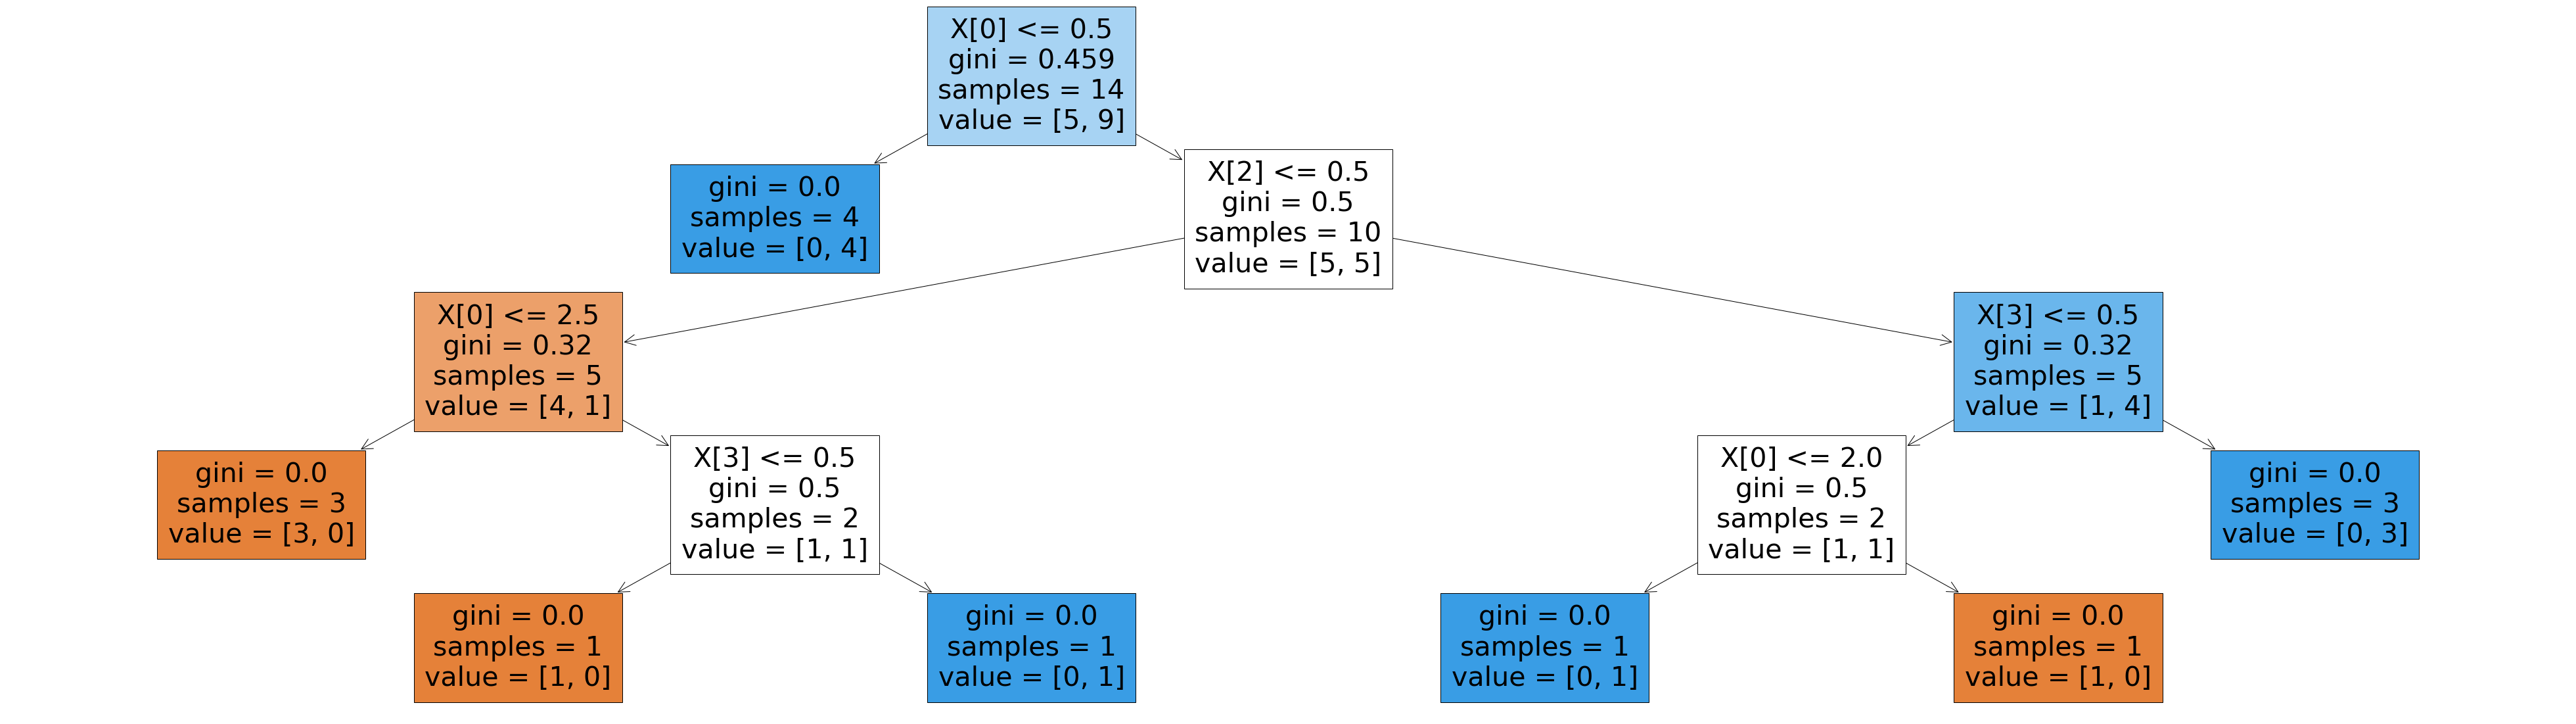

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()

/var/folders/ch/j5cbhdl91b775tb75x3c57400000gn/T/ipykernel_18130/1181382685.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])


Training Accuracy: 1.00
Test Accuracy: 0.33


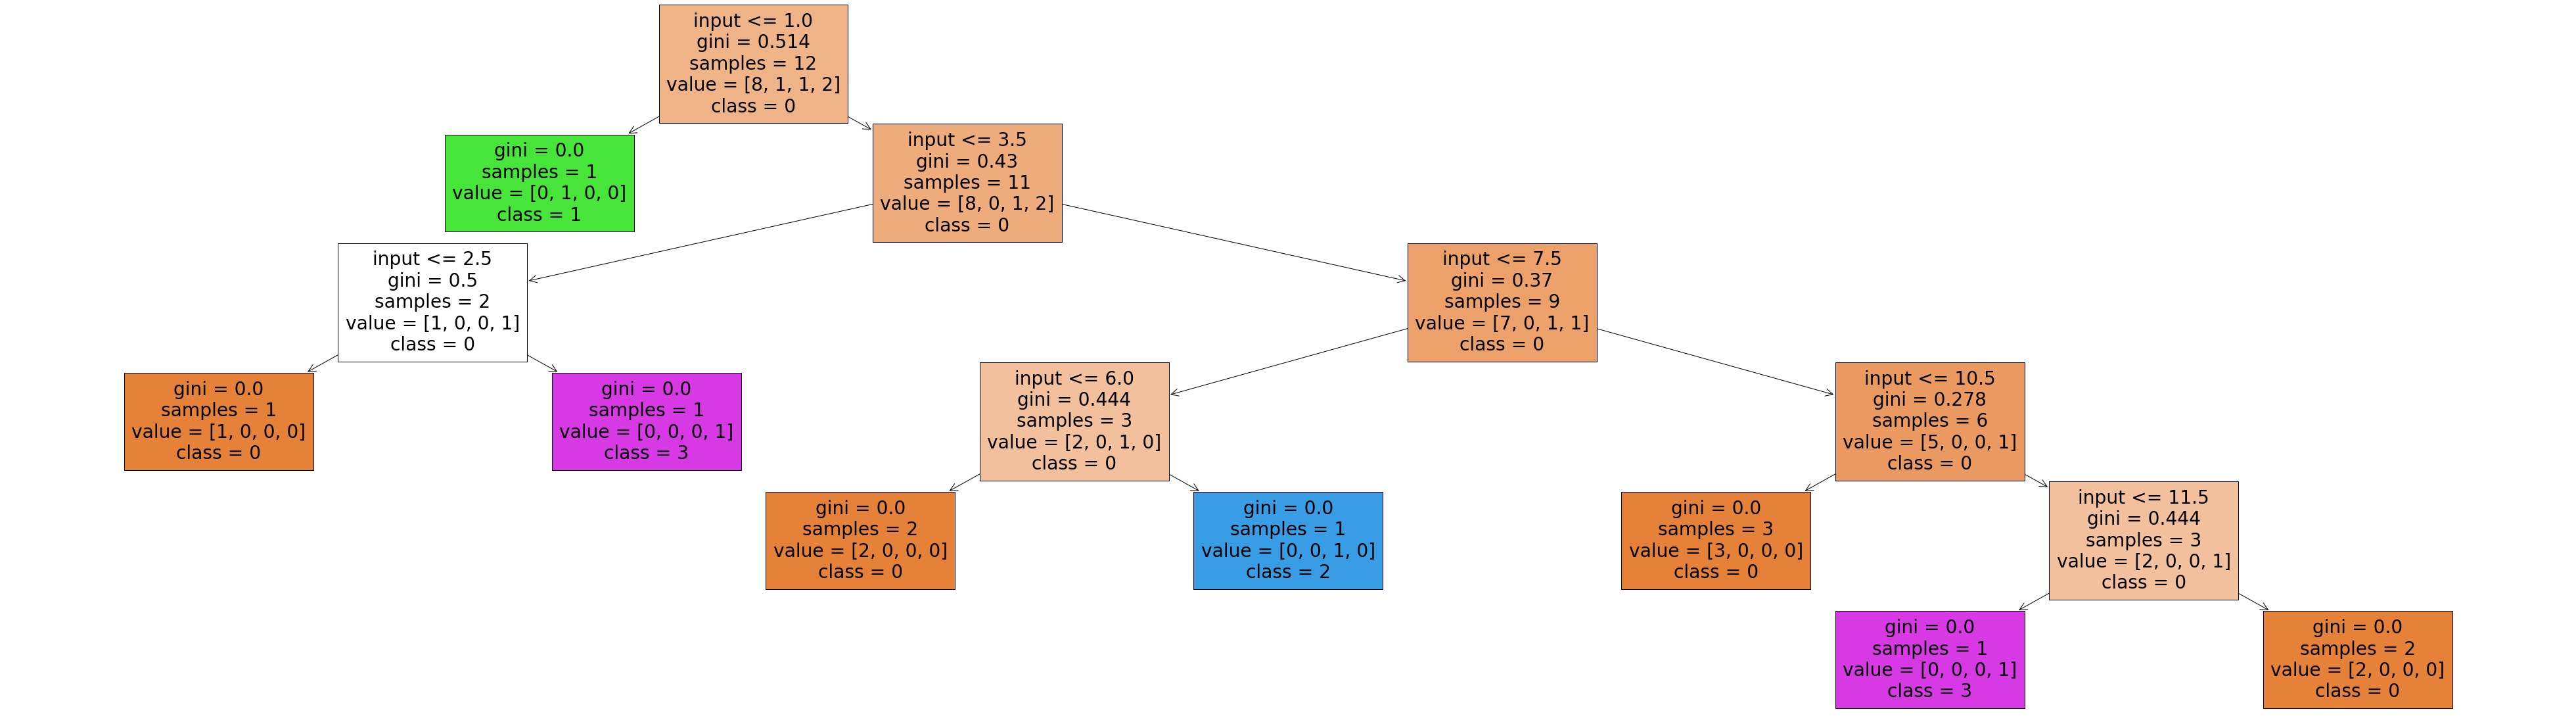

<Figure size 432x288 with 0 Axes>

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


df = pd.read_excel('training (1).xlsx')
df1=df.head(15)
for col in df1.columns:
    df1[col] = le.fit_transform(df1[col])

X = df1.drop(columns=['output'])
y = df1['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)


clf.fit(X_train, y_train)


train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)


train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


plt.figure(figsize=(70, 20))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=list(map(str, clf.classes_)))
plt.show()
plt.tight_layout()

/var/folders/ch/j5cbhdl91b775tb75x3c57400000gn/T/ipykernel_18130/1993268250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])


Training Accuracy (with criterion='entropy' and max_depth constraint): 0.83
Test Accuracy (with criterion='entropy' and max_depth constraint): 0.33


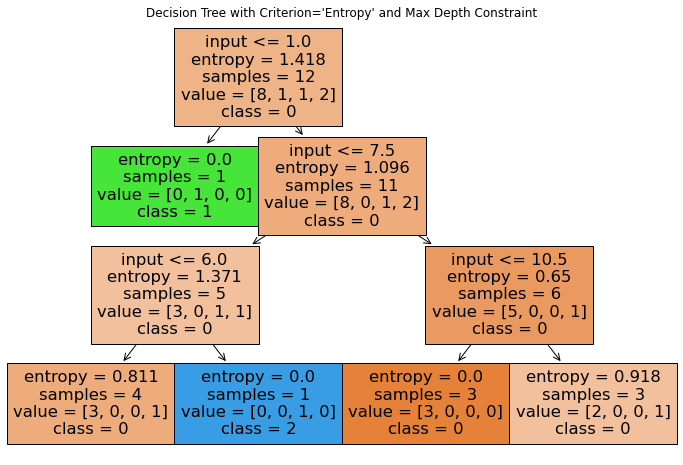

In [37]:
df = pd.read_excel('training (1).xlsx')
df1=df.head(15)
for col in df1.columns:
    df1[col] = le.fit_transform(df1[col])

X = df1.drop(columns=['output'])
y = df1['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf_entropy_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)


clf_entropy_max_depth.fit(X_train, y_train)


train_predictions_entropy_max_depth = clf_entropy_max_depth.predict(X_train)
test_predictions_entropy_max_depth = clf_entropy_max_depth.predict(X_test)


train_accuracy_entropy_max_depth = accuracy_score(y_train, train_predictions_entropy_max_depth)
test_accuracy_entropy_max_depth = accuracy_score(y_test, test_predictions_entropy_max_depth)

print(f"Training Accuracy (with criterion='entropy' and max_depth constraint): {train_accuracy_entropy_max_depth:.2f}")
print(f"Test Accuracy (with criterion='entropy' and max_depth constraint): {test_accuracy_entropy_max_depth:.2f}")


plt.figure(figsize=(12, 8))
plot_tree(clf_entropy_max_depth, filled=True, feature_names=X.columns, class_names=list(map(str, clf_entropy_max_depth.classes_)))
plt.title("Decision Tree with Criterion='Entropy' and Max Depth Constraint")
plt.show()

/var/folders/ch/j5cbhdl91b775tb75x3c57400000gn/T/ipykernel_18130/2060456932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])


Training Accuracy: 1.00
Test Accuracy: 0.33


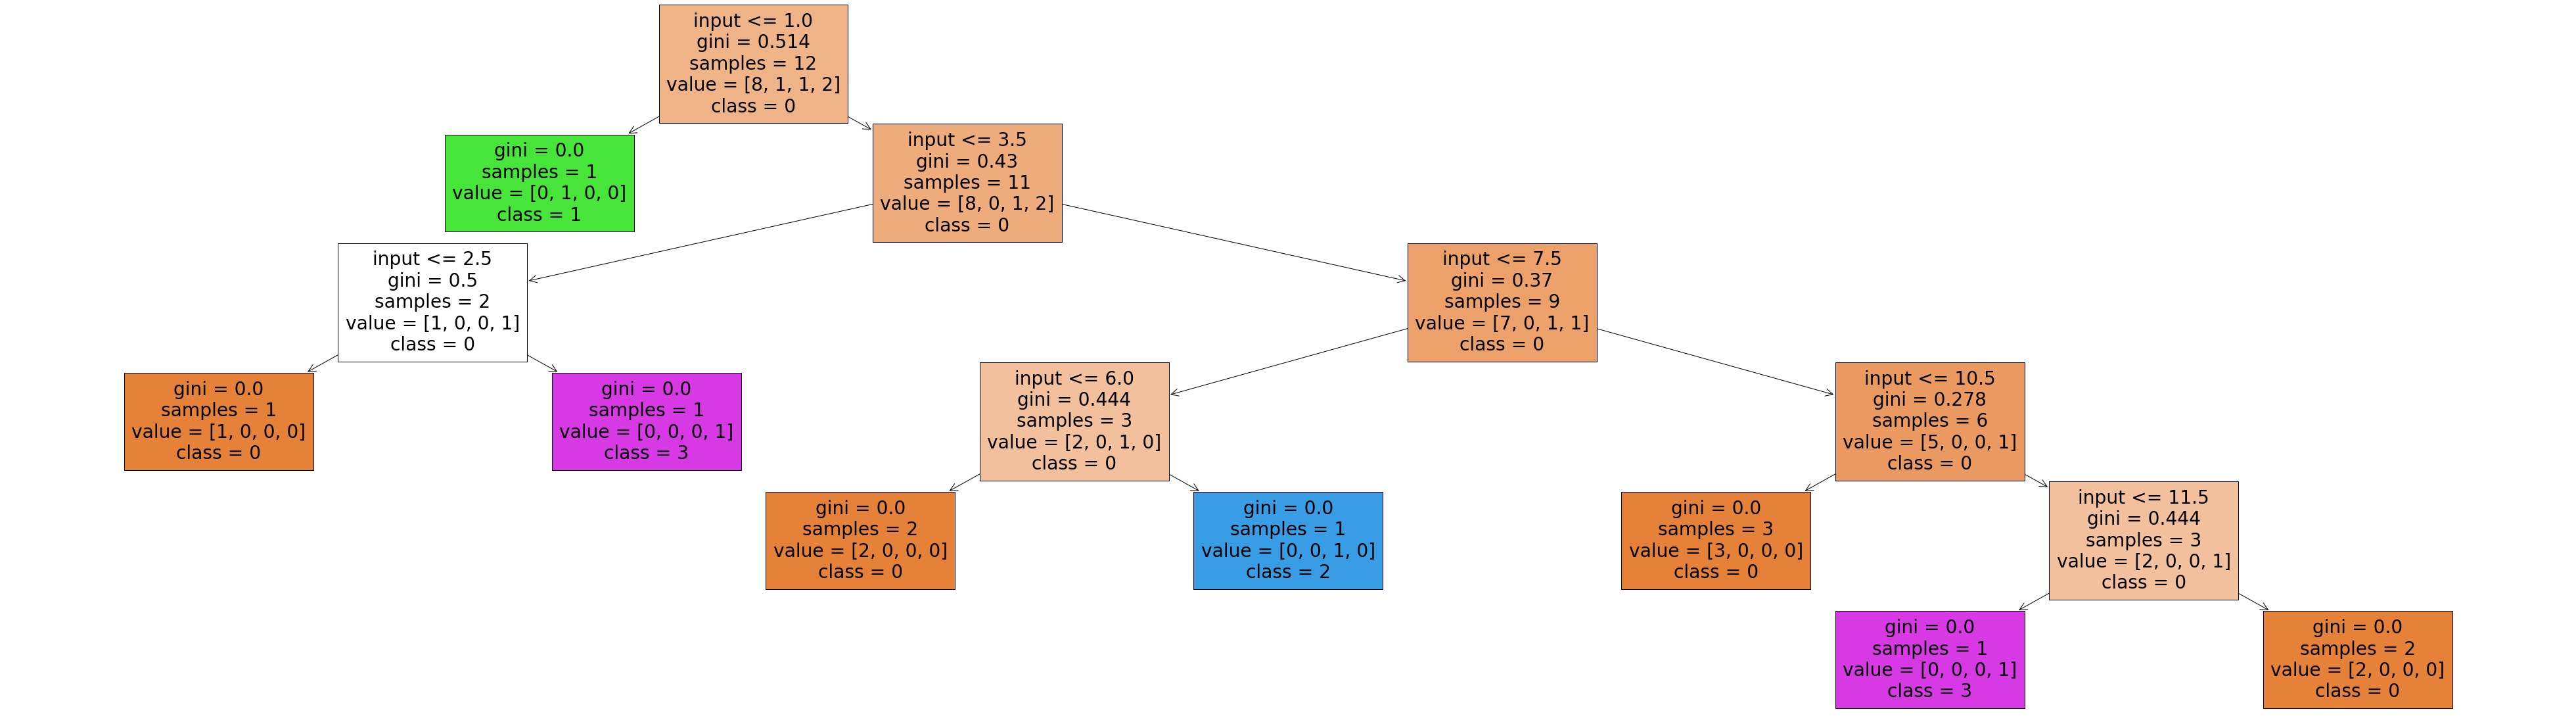

Training Accuracy (with criterion='entropy'): 1.00
Test Accuracy (with criterion='entropy'): 0.33


<Figure size 432x288 with 0 Axes>

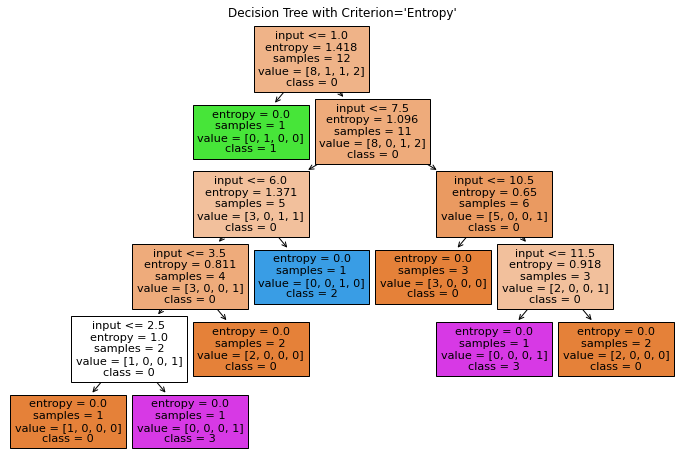

In [39]:
df = pd.read_excel('training (1).xlsx')
df1=df.head(15)
for col in df1.columns:
    df1[col] = le.fit_transform(df1[col])
X = df1.drop(columns=['output'])
y = df1['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
plt.figure(figsize=(70, 20))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=list(map(str, clf.classes_)))
plt.show()
plt.tight_layout()

clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
train_predictions_entropy = clf_entropy.predict(X_train)
test_predictions_entropy = clf_entropy.predict(X_test)
train_accuracy_entropy = accuracy_score(y_train, train_predictions_entropy)
test_accuracy_entropy = accuracy_score(y_test, test_predictions_entropy)
print(f"Training Accuracy (with criterion='entropy'): {train_accuracy_entropy:.2f}")
print(f"Test Accuracy (with criterion='entropy'): {test_accuracy_entropy:.2f}")
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=list(map(str, clf_entropy.classes_)))
plt.title("Decision Tree with Criterion='Entropy'")
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
df = pd.read_excel('training (1).xlsx')
df1=df.head(15)
for col in df1.columns:
    df1[col] = le.fit_transform(df1[col])

X = df1.drop(columns=['output'])
y = df1['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf_decision_tree = DecisionTreeClassifier(random_state=42)

clf_decision_tree.fit(X_train, y_train)


test_predictions_decision_tree = clf_decision_tree.predict(X_test)


accuracy_decision_tree = accuracy_score(y_test, test_predictions_decision_tree)


print("Performance Metrics for Decision Tree Classifier:")
print(f"Accuracy: {accuracy_decision_tree:.2f}")
print(classification_report(y_test, test_predictions_decision_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions_decision_tree))


clf_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)


clf_random_forest.fit(X_train, y_train)


test_predictions_random_forest = clf_random_forest.predict(X_test)


accuracy_random_forest = accuracy_score(y_test, test_predictions_random_forest)


print("\nPerformance Metrics for Random Forest Classifier:")
print(f"Accuracy: {accuracy_random_forest:.2f}")
print(classification_report(y_test, test_predictions_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions_random_forest))

Performance Metrics for Decision Tree Classifier:
Accuracy: 0.33
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Confusion Matrix:
[[1 1]
 [1 0]]

Performance Metrics for Random Forest Classifier:
Accuracy: 0.33
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Confusion Matrix:
[[1 1]
 [1 0]]


/var/folders/ch/j5cbhdl91b775tb75x3c57400000gn/T/ipykernel_18130/2413310071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])
